In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
# Load the data
atheletes_csv = pd.read_csv('athlete_events.csv')
regions_csv = pd.read_csv('noc_regions.csv')

In [93]:
# Clean the data
athletes_columns_to_be_cleaned = ['Age']
atheletes_csv = atheletes_csv.dropna(axis=0, subset=athletes_columns_to_be_cleaned)

# Make sure the first letter of the columns is capitalized, but if a column has multiple capital letters, keep it like that
# This is to make sure the columns are consistent

regions_columns_to_be_cleaned = ['Continent']
regions_csv = regions_csv.dropna(axis=0, subset=regions_columns_to_be_cleaned)
# We cleaned the data so every country is part of the 5 continents that participate in the olympic games
# Europe, Asia, Africa, America, Oceania
regions_order = ['Europe', 'Asia', 'Africa', 'America', 'Oceania']

# Merge the data
merged_data = pd.merge(atheletes_csv, regions_csv, on='NOC')



In [94]:
# Utility variables
medal_data = merged_data.dropna(axis=0, subset=['Medal'])
medal_count = medal_data['Continent'].value_counts()
medal_count = medal_count.reindex(regions_order)

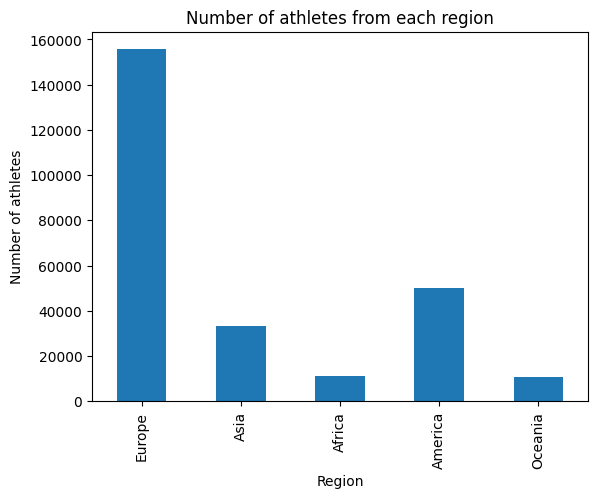

In [95]:
# 2.1
# ### 2.1. From which region do the most athletes come from?

# Count the number of athletes from each region
athletes_count = merged_data['Continent'].value_counts()
athletes_count = athletes_count.reindex(regions_order)
athletes_count.plot(kind='bar')
plt.title('Number of athletes from each region')
plt.xlabel('Region')
plt.ylabel('Number of athletes')
plt.show()

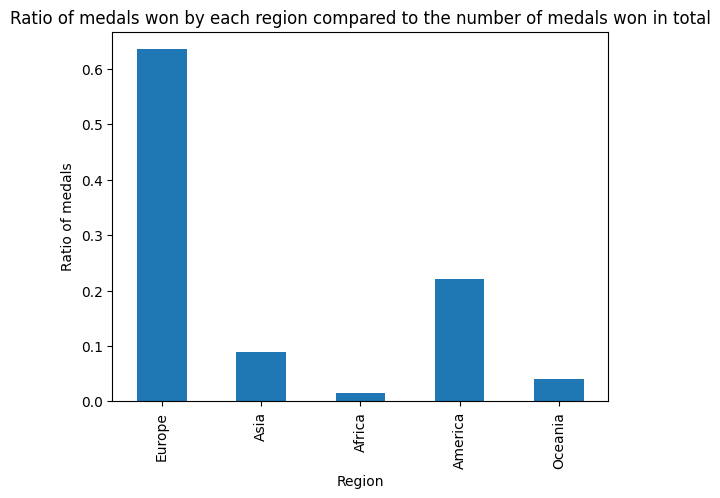

In [96]:
# 2.2
# Show the ratio of medals won by each country compared to the number of medals won in total
total_medals = medal_count.sum()
medal_ratio = medal_count / total_medals
medal_ratio = medal_ratio.reindex(regions_order)
medal_ratio.plot(kind='bar')
plt.title('Ratio of medals won by each region compared to the number of medals won in total')
plt.xlabel('Region')
plt.ylabel('Ratio of medals')
plt.show()

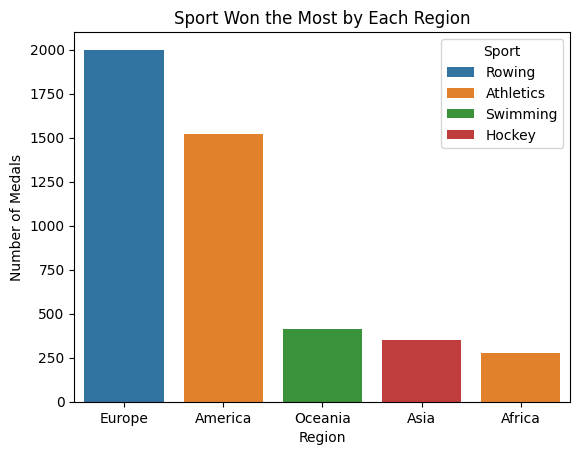

In [97]:
# 2.3
### 2.3. Which sport is won the most by which region?
# Count the number of medals won by each region in each sport

medals_won_by_each_region_in_each_sport = merged_data.dropna(axis=0, subset=['Medal']).groupby(['Continent', 'Sport'])['Medal'].count().reset_index()
medals_won_by_each_region_in_each_sport = medals_won_by_each_region_in_each_sport.sort_values('Medal', ascending=False).drop_duplicates(subset='Continent', keep='first')
fig, ax = plt.subplots()
sns.barplot(x='Continent', y='Medal', data=medals_won_by_each_region_in_each_sport, hue='Sport', ax=ax)
ax.set_title('Sport Won the Most by Each Region')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Medals')
plt.show()



    Continent  Year  Medal
89     Europe  1896     78
90     Europe  1900    390
26    America  1904    390
92     Europe  1906    278
93     Europe  1908    631
94     Europe  1912    803
95     Europe  1920    938
96     Europe  1924    638
97     Europe  1928    573
98     Europe  1932    389
99     Europe  1936    798
100    Europe  1948    691
101    Europe  1952    730
102    Europe  1956    684
103    Europe  1960    721
104    Europe  1964    840
105    Europe  1968    843
106    Europe  1972   1013
107    Europe  1976   1167
108    Europe  1980   1464
109    Europe  1984    911
110    Europe  1988   1306
111    Europe  1992   1218
112    Europe  1994    245
113    Europe  1996    910
114    Europe  1998    315
115    Europe  2000   1035
116    Europe  2002    293
117    Europe  2004   1003
118    Europe  2006    370
119    Europe  2008    858
120    Europe  2010    285
121    Europe  2012    925
122    Europe  2014    406
123    Europe  2016   1018


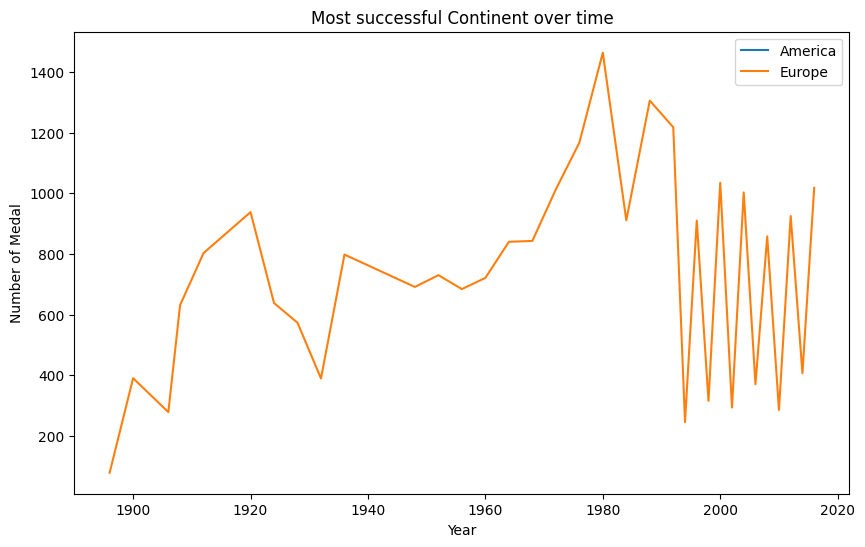

In [99]:
# 2.4
# ### 2.4. Who are the most succesful Continents over time?
# line plot
# Only show the top performant region, so only 1 line is shown

# Count the number of medals won by each region in each year
df = merged_data.dropna(axis=0, subset=['Medal'])
grouped = df.groupby(['Continent', 'Year']).size().reset_index(name='Medal')

# For each Year, find the Continent with the most Medal
most_successful_Continents = grouped.loc[grouped.groupby('Year')['Medal'].idxmax()]
print(most_successful_Continents)

# Plot a line graph
plt.figure(figsize=(10, 6))
for Continent, data in most_successful_Continents.groupby('Continent'):
    plt.plot(data['Year'], data['Medal'], label=Continent)
plt.title('Most successful Continent over time')
plt.xlabel('Year')
plt.ylabel('Number of Medal')
plt.legend()
plt.show()

